In [125]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [126]:
#Loading dataset
Qual_wine_test = pd.read_csv(r"C:\Users\user\Downloads\winequality/winequality-red.csv",delimiter=';')

In [127]:
#Let's check the sample of the data
Qual_wine_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [128]:
Qual_wine_test.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [129]:
#Information about the data columns
Qual_wine_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

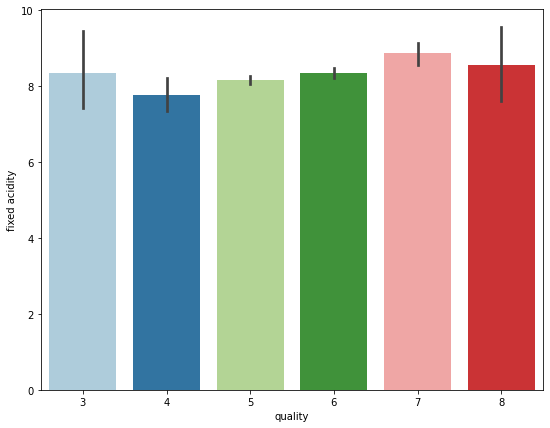

In [131]:
#Here we see that fixed acidity does not give any specification to classify the quality.
figure = plt.figure(figsize = (9,7))
sns.barplot(x = 'quality', y = 'fixed acidity', data = Qual_wine_test, palette="Paired")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

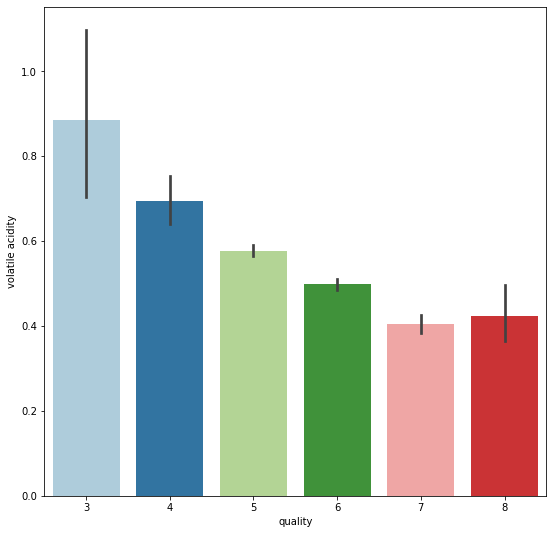

In [132]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (9,9))
sns.barplot(x = 'quality', y = 'volatile acidity', data = Qual_wine_test ,  palette="Paired")

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

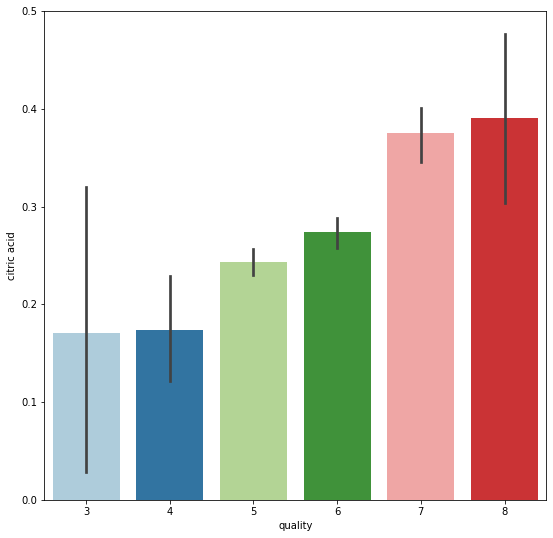

In [133]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (9,9))
sns.barplot(x = 'quality', y = 'citric acid', data = Qual_wine_test ,palette="Paired")

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

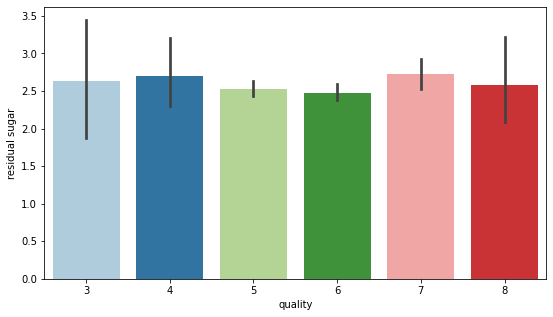

In [134]:
fig = plt.figure(figsize = (9,5))
sns.barplot(x = 'quality', y = 'residual sugar', data = Qual_wine_test ,palette="Paired")

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

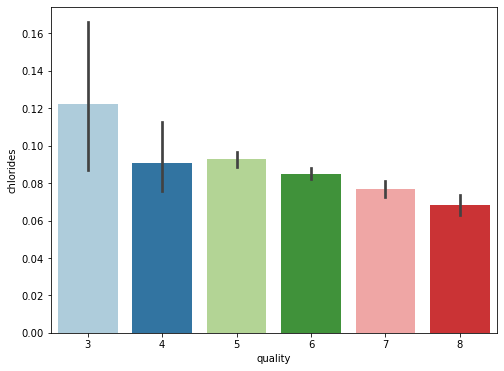

In [135]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'chlorides', data =Qual_wine_test ,palette="Paired")

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

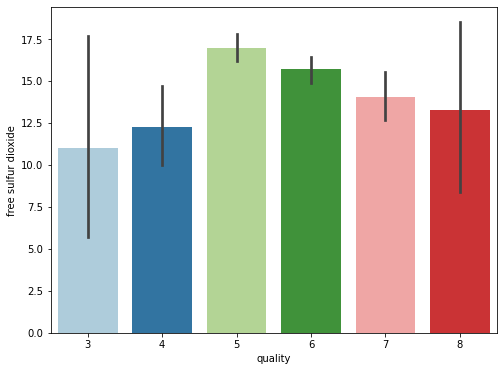

In [136]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = Qual_wine_test,palette="Paired")

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

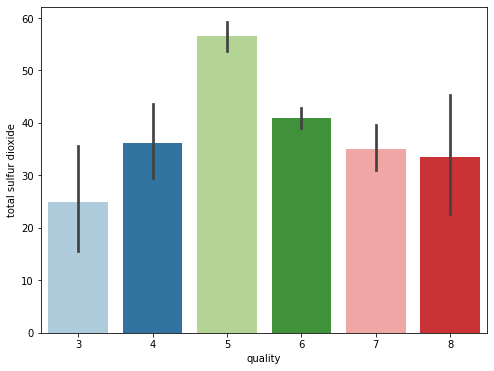

In [137]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = Qual_wine_test ,palette="Paired")

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

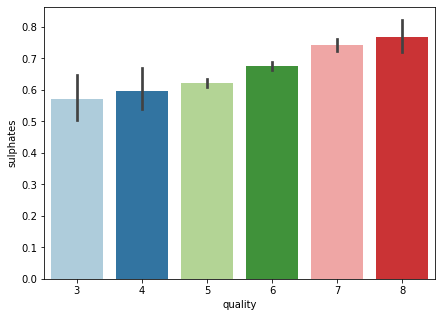

In [138]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (7,5))
sns.barplot(x = 'quality', y = 'sulphates', data = Qual_wine_test ,palette="Paired")

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

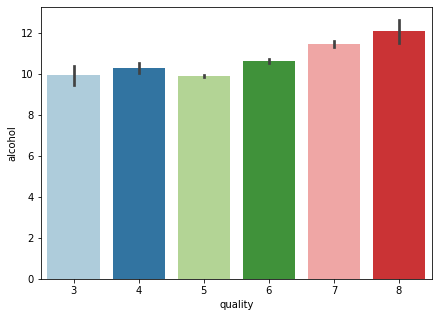

In [139]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (7,5))
sns.barplot(x = 'quality', y = 'alcohol', data = Qual_wine_test ,palette="Paired")

Preprocessing Data for performing Machine learning algorithms

In [140]:
#Dividing wine as good and bad by giving the limit for the quality
quality_bins = (2, 6.5, 8)
group_names = ['bad', 'good']
Qual_wine_test ['quality'] = pd.cut(Qual_wine_test ['quality'], bins = quality_bins, labels = group_names)

In [141]:
Qual_wine_test 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [142]:
#Now lets assign a labels to our quality variable
lbl_qu= LabelEncoder()

In [143]:
#Bad becomes 0 and good becomes 1 
Qual_wine_test ['quality'] = lbl_qu.fit_transform(Qual_wine_test ['quality'])

In [144]:
Qual_wine_test ['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

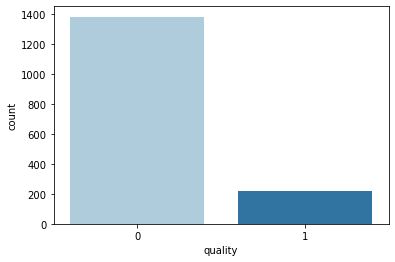

In [145]:
sns.countplot(Qual_wine_test ['quality'],palette="Paired")

In [146]:
#Now seperate the dataset as response variable and feature variabes
X = Qual_wine_test .drop('quality', axis = 1)
y = Qual_wine_test['quality']

In [147]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [148]:
#Applying Standard scaling to get optimized result
st_sc = StandardScaler()

In [149]:
X_train = st_sc.fit_transform(X_train)
X_test = st_sc.fit_transform(X_test)

Our training and testing data is ready now to perform machine learning algorithm

Random Forest Classifier

In [152]:
random_f= RandomForestClassifier(n_estimators=200)
random_f.fit(X_train, y_train)
pred_random_frst = random_f.predict(X_test)

In [153]:
#Let's see how our model performed
print(classification_report(y_test, pred_random_frst))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.61      0.36      0.45        47

    accuracy                           0.87       320
   macro avg       0.75      0.66      0.69       320
weighted avg       0.85      0.87      0.86       320



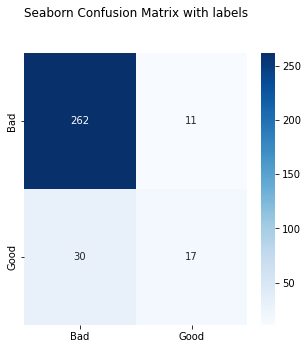

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_random_frst)

plt.figure(figsize=(5, 5))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
#ax.set_xlabel('Bad#\n ')
#ax.set_ylabel('Good');
ax.xaxis.set_ticklabels(["Bad","Good"])
ax.yaxis.set_ticklabels(["Bad","Good"])


## Display the visualization of the Confusion Matrix.
plt.show()

Stochastic Gradient Decent Classifier

In [155]:
S_grad = SGDClassifier(penalty=None)
S_grad.fit(X_train, y_train)
pred_st_gradient = S_grad.predict(X_test)

In [156]:
print(classification_report(y_test, pred_st_gradient))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       273
           1       0.52      0.26      0.34        47

    accuracy                           0.86       320
   macro avg       0.70      0.61      0.63       320
weighted avg       0.83      0.86      0.83       320



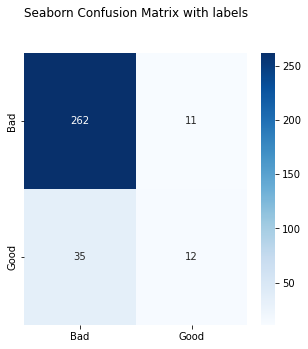

In [157]:
cf_matrix = confusion_matrix(y_test, pred_st_gradient)

plt.figure(figsize=(5, 5))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
#ax.set_xlabel('Bad#\n ')
#ax.set_ylabel('Good');
ax.xaxis.set_ticklabels(["Bad","Good"])
ax.yaxis.set_ticklabels(["Bad","Good"])


## Display the visualization of the Confusion Matrix.
plt.show()

Support Vector Classifier

In [158]:
SVM1 = SVC()
SVM1 .fit(X_train, y_train)
pred_SVM= support_vm .predict(X_test)

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_support_vm )


In [160]:
print(classification_report(y_test, pred_support_vm ))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



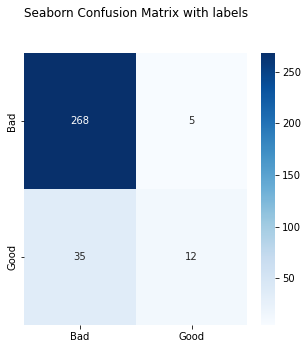

In [161]:
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');

ax.xaxis.set_ticklabels(["Bad","Good"])
ax.yaxis.set_ticklabels(["Bad","Good"])


## Display the visualization of the Confusion Matrix.
plt.show()